In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings

In [2]:
plt.style.use("fivethirtyeight")
warnings.filterwarnings('ignore')

In [3]:
ball_by_ball = pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv")

In [4]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
ball_by_ball.tail()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193467,1237181,1,13,3,SS Iyer,RR Pant,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [6]:
ball_by_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [7]:
ball_by_ball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [8]:
ball_by_ball.shape

(193468, 18)

In [9]:
print(f"This Dataset have {ball_by_ball.shape[0]} rows and {ball_by_ball.shape[1]} columns.")

This Dataset have 193468 rows and 18 columns.


In [10]:
# Checking Null Values
num_null = ball_by_ball.isnull().sum().sum()
print("No of Null Values: {}".format(num_null))

No of Null Values: 738056


**PLots**

Plot missing values

<Figure size 1296x1296 with 0 Axes>

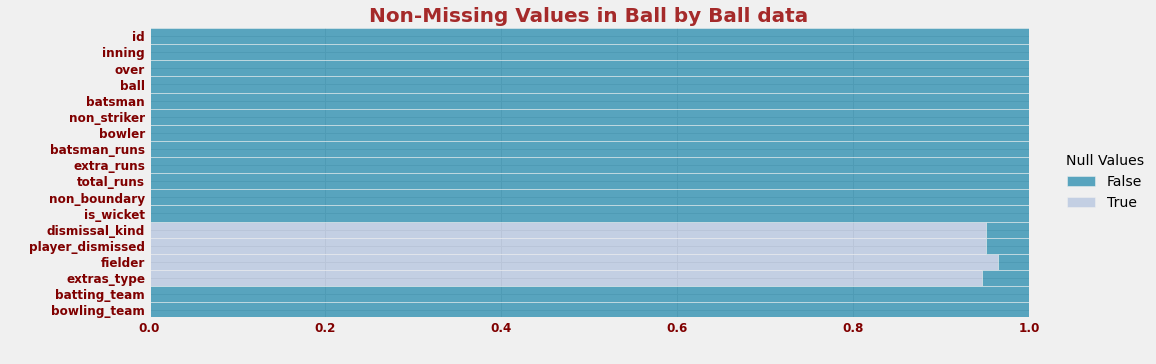

In [11]:
plt.figure(figsize=(18, 18))

sns.displot(
data = ball_by_ball.isna().melt(value_name="Null Values"),
y = "variable",
hue = "Null Values",
multiple="fill",
aspect=3,
palette='PuBuGn_r' 
)
plt.title('Non-Missing Values in Ball by Ball data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

In [12]:
corelation = ball_by_ball.corr()

<AxesSubplot:>

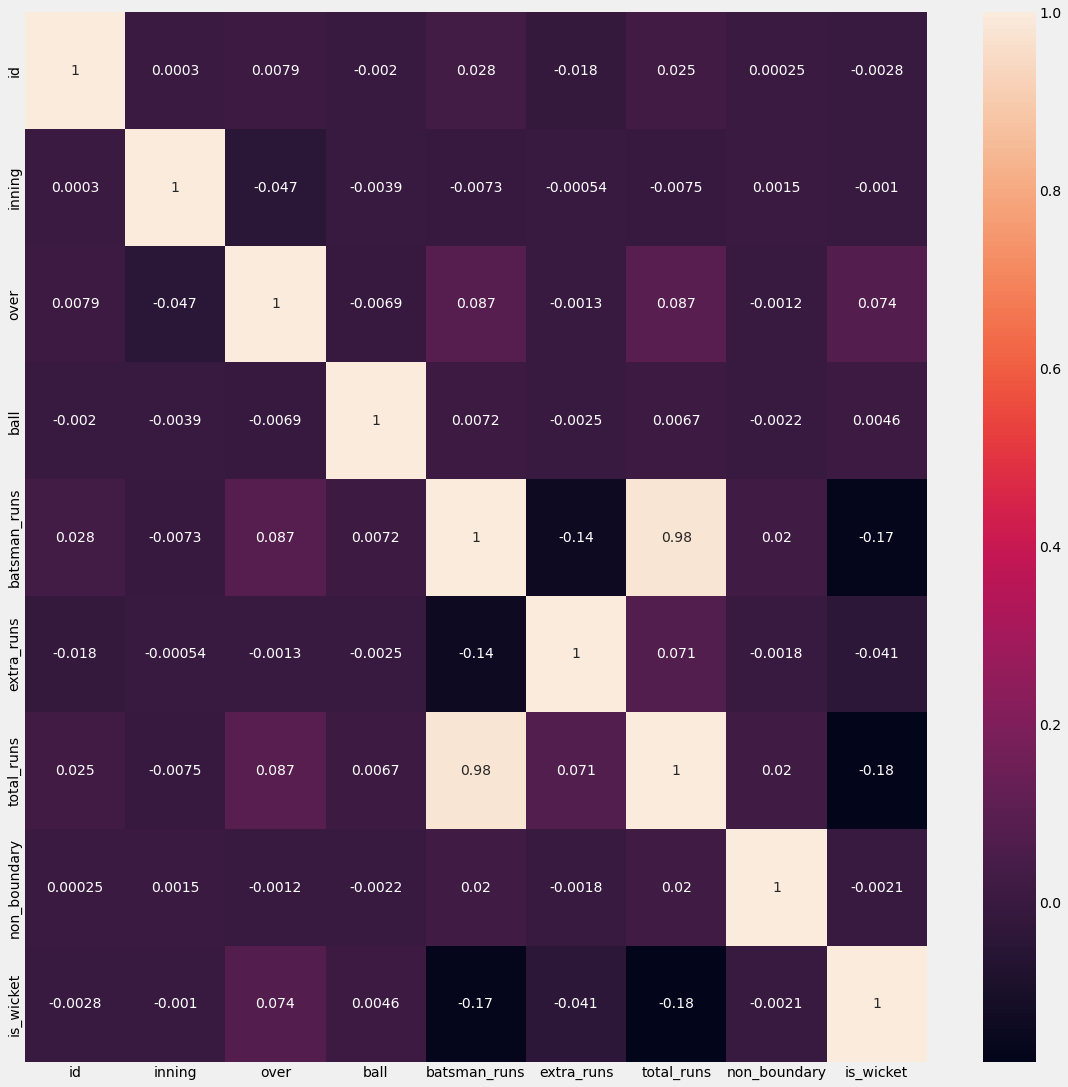

In [13]:
plt.figure(figsize=(18, 18))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

<AxesSubplot:>

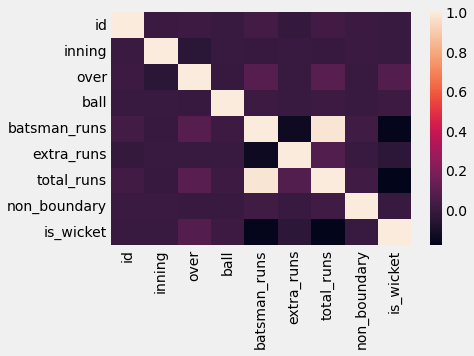

In [14]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns)

In [15]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


**Most Runs Scored**

In [16]:
most_runs = ball_by_ball.groupby(['id'])['total_runs'].sum().reset_index()

In [17]:
most_runs.head()

,id,total_runs
0,335982,304
1,335983,447
2,335984,261
3,335985,331
4,335986,222


In [18]:
# Ascending Order
asc_most_runs = most_runs.sort_values(by="total_runs", ascending=True)
asc_most_runs

,id,total_runs
241,501265,56
744,1178424,103
39,336021,135
611,1082626,135
411,729305,141
...,...,...
1,335983,447
791,1216527,449
626,1082641,453
679,1136604,459


In [19]:
# Descending Order
desc_most_runs = most_runs.sort_values(by="total_runs", ascending=False)
desc_most_runs

,id,total_runs
146,419137,469
679,1136604,459
626,1082641,453
791,1216527,449
1,335983,447
...,...,...
411,729305,141
611,1082626,135
39,336021,135
744,1178424,103


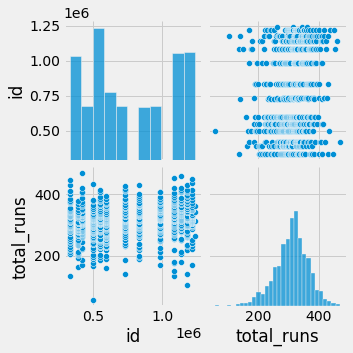

In [20]:
sns.pairplot(asc_most_runs)

**Matches**

In [21]:
matches = pd.read_csv("../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv")

In [22]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [23]:
matches.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [24]:
# Adding Season Year in DF
matches['season'] = pd.DatetimeIndex(matches['date']).year

In [25]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [26]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
season               0
dtype: int64

In [27]:
num_matches_null = matches.isnull().sum().sum()
print("Matches have {} null values.".format(num_matches_null))

Matches have 843 null values.


In [28]:
# as we see method column has most null values
cd = matches.dropna(subset=['method'])

In [29]:
cd.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen,2008
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan,2008
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade,2009
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade,2009
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene,2009


In [30]:
cd.describe()

,id,neutral_venue,result_margin,season
count,1.900000e+01,19.000000,19.000000,19.000000
mean,7.453789e+05,0.157895,14.000000,2013.421053
std,3.070874e+05,0.374634,17.885438,3.671448
min,3.360220e+05,0.000000,3.000000,2008.000000
25%,4.467145e+05,0.000000,6.500000,2010.000000
50%,8.297430e+05,0.000000,9.000000,2015.000000
75%,9.809980e+05,0.000000,11.500000,2016.000000
max,1.136592e+06,1.000000,82.000000,2018.000000


In [31]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 40 to 667
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               19 non-null     int64  
 1   city             19 non-null     object 
 2   date             19 non-null     object 
 3   player_of_match  19 non-null     object 
 4   venue            19 non-null     object 
 5   neutral_venue    19 non-null     int64  
 6   team1            19 non-null     object 
 7   team2            19 non-null     object 
 8   toss_winner      19 non-null     object 
 9   toss_decision    19 non-null     object 
 10  winner           19 non-null     object 
 11  result           19 non-null     object 
 12  result_margin    19 non-null     float64
 13  eliminator       19 non-null     object 
 14  method           19 non-null     object 
 15  umpire1          19 non-null     object 
 16  umpire2          19 non-null     object 
 17  season          

<AxesSubplot:>

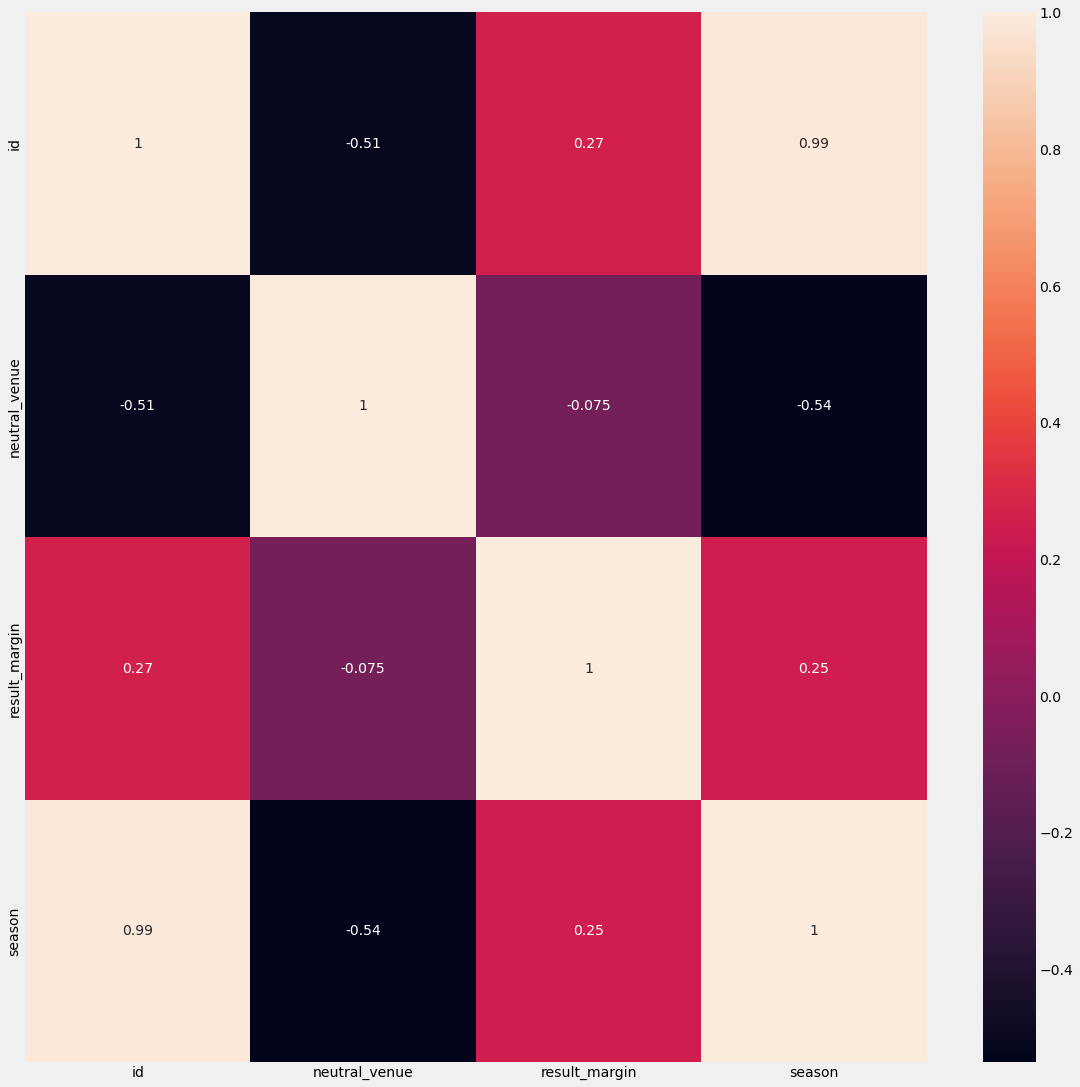

In [32]:
m_corr = cd.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(m_corr, xticklabels=m_corr.columns, yticklabels=m_corr.columns, annot=True)

<AxesSubplot:>

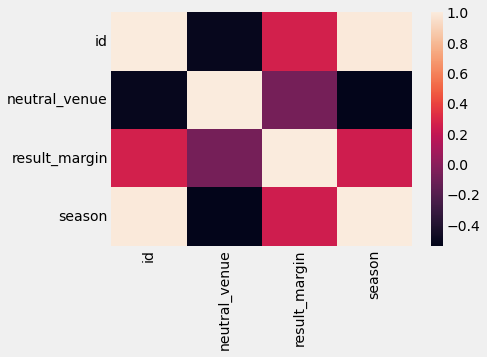

In [33]:
m_corr = cd.corr()
sns.heatmap(m_corr, xticklabels=m_corr.columns, yticklabels=m_corr.columns)

<Figure size 1224x1224 with 0 Axes>

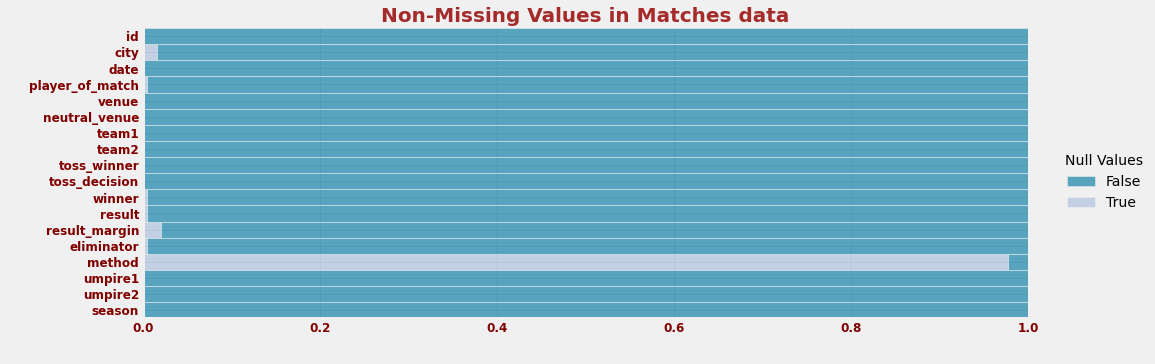

In [34]:
plt.figure(figsize=(17, 17))
sns.displot(
data=matches.isna().melt(value_name="Null Values"),
y="variable",
hue="Null Values",
palette="PuBuGn_r",
multiple="fill",
aspect=3
)
plt.title('Non-Missing Values in Matches data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

In [35]:
merged = desc_most_runs[['id', 'total_runs']].merge(matches, left_on='id', right_on='id', how='left')

In [36]:
merged.head()

,id,total_runs,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,419137,469,Chennai,2010-04-03,M Vijay,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Chennai Super Kings,runs,23.0,N,NaN,RE Koertzen,RB Tiffin,2010
1,1136604,459,Indore,2018-05-12,SP Narine,Holkar Cricket Stadium,0,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,field,Kolkata Knight Riders,runs,31.0,N,NaN,VK Sharma,CK Nandan,2018
2,1082641,453,Mumbai,2017-05-11,WP Saha,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,7.0,N,NaN,A Deshmukh,A Nand Kishore,2017
3,1216527,449,Sharjah,2020-09-27,SV Samson,Sharjah Cricket Stadium,0,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,NaN,RK Illingworth,K Srinivasan,2020
4,335983,447,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


In [37]:
# total runs in each season
season_most_runs = merged.groupby(['season'])['total_runs'].sum().reset_index()
season_most_runs

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


In [38]:
print("Most runs {} is in the season {}.".format(season_most_runs.max()['total_runs'], season_most_runs.max()['season']))

Most runs 22541 is in the season 2020.


In [39]:
# Ascending
season_most_runs.sort_values(by='total_runs', ascending=True)

,season,total_runs
1,2009,16320
0,2008,17937
7,2015,18332
9,2017,18769
8,2016,18862
2,2010,18864
6,2014,18909
12,2020,19352
11,2019,19400
10,2018,19901


In [40]:
# Descending
season_most_runs.sort_values(by='total_runs', ascending=False)

,season,total_runs
5,2013,22541
4,2012,22453
3,2011,21154
10,2018,19901
11,2019,19400
12,2020,19352
6,2014,18909
2,2010,18864
8,2016,18862
9,2017,18769


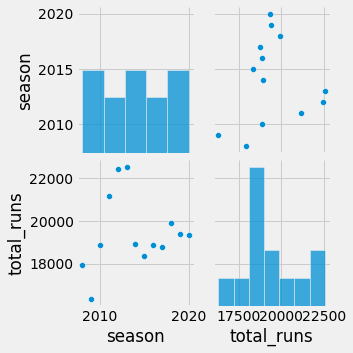

In [41]:
sns.pairplot(season_most_runs)

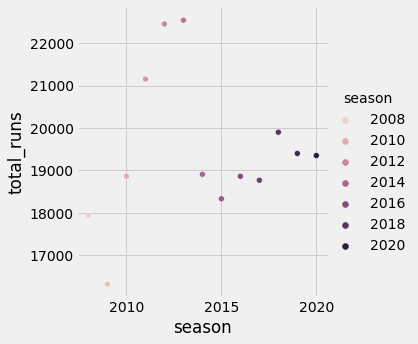

In [42]:
sns.relplot(x='season', y='total_runs', data=season_most_runs, hue='season')

In [43]:
merged.head()

,id,total_runs,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,419137,469,Chennai,2010-04-03,M Vijay,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Chennai Super Kings,runs,23.0,N,NaN,RE Koertzen,RB Tiffin,2010
1,1136604,459,Indore,2018-05-12,SP Narine,Holkar Cricket Stadium,0,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,field,Kolkata Knight Riders,runs,31.0,N,NaN,VK Sharma,CK Nandan,2018
2,1082641,453,Mumbai,2017-05-11,WP Saha,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,7.0,N,NaN,A Deshmukh,A Nand Kishore,2017
3,1216527,449,Sharjah,2020-09-27,SV Samson,Sharjah Cricket Stadium,0,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,NaN,RK Illingworth,K Srinivasan,2020
4,335983,447,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


In [44]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [45]:
# most runs scored by which batsman
most_runs_by_batsman = ball_by_ball.groupby('batsman')['total_runs'].sum().reset_index()
most_runs_by_batsman

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Dananjaya,4
...,...,...
532,YV Takawale,207
533,Yashpal Singh,49
534,Younis Khan,3
535,Yuvraj Singh,2880


In [46]:
sort_most_runs_by_batsman = most_runs_by_batsman.sort_values(by='total_runs', ascending=False)
sort_most_runs_by_batsman

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
...,...,...
387,RR Bhatkal,0
91,C Nanda,0
413,S Lamichhane,0
506,V Pratap Singh,0


In [47]:
max_runs = sort_most_runs_by_batsman.max()['total_runs']
max_player = sort_most_runs_by_batsman.max()['batsman']

In [48]:
print(f"Most runs of {max_runs} is by {max_player}.")

Most runs of 6081 is by Z Khan.


In [49]:
sort_most_runs_by_batsman[sort_most_runs_by_batsman['total_runs'] != 0]

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
...,...,...
166,HF Gurney,1
251,LE Plunkett,1
81,BE Hendricks,1
469,Shahbaz Ahmed,1


In [50]:
# top 10
sort_most_runs_by_batsman[:10]

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
96,CH Gayle,5103
24,AB de Villiers,5016
398,RV Uthappa,4878
301,MS Dhoni,4855
154,G Gambhir,4479


In [51]:
sort_most_runs_by_batsman.set_index('batsman', inplace=True)

In [52]:
top_batsman_20 = sort_most_runs_by_batsman[:20]

<AxesSubplot:xlabel='batsman'>

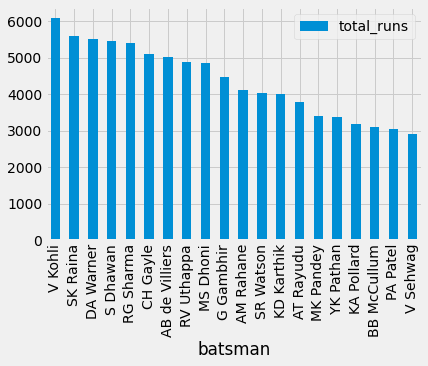

In [53]:
top_batsman_20.plot(kind="bar")

In [54]:
# We have seen that most runs scored by virat kholi.

In [55]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [56]:
matches.toss_winner

0      Royal Challengers Bangalore
1              Chennai Super Kings
2                 Rajasthan Royals
3                   Mumbai Indians
4                  Deccan Chargers
                  ...             
811                 Mumbai Indians
812                 Delhi Capitals
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Delhi Capitals
Name: toss_winner, Length: 816, dtype: object

In [57]:
matches.winner

0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object

In [58]:
winner_toss = matches.toss_winner == matches.winner

In [59]:
winner_toss.value_counts()

True     418
False    398
dtype: int64

<AxesSubplot:ylabel='None'>

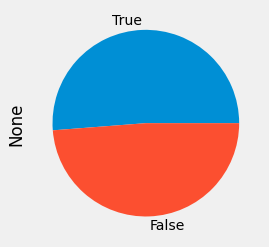

In [60]:
winner_toss.value_counts().plot(kind="pie")

In [61]:
import warnings

([<matplotlib.patches.Wedge at 0x7f9b52ce7950>,
 [Text(-0.042339411351007016, 1.0991848680938299, 'Matches wins (Toss Wins)'),
  Text(0.04233941135100639, -1.09918486809383, 'Matches Loss (Toss Loss)')],
 [Text(-0.023094224373276552, 0.5995553825966344, '51.23%'),
  Text(0.02309422437327621, -0.5995553825966345, '48.77%')])

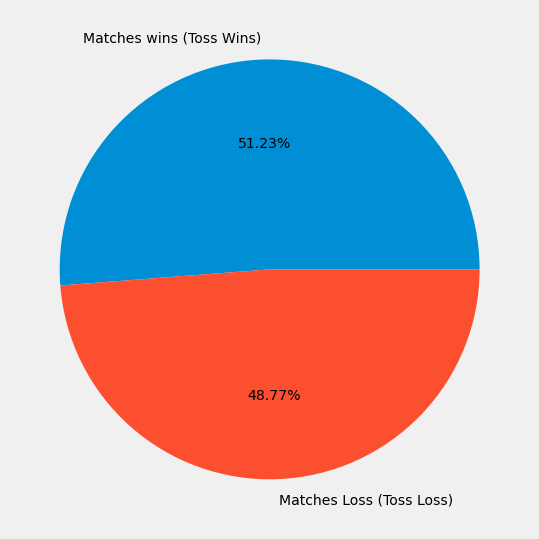

In [62]:
winner_losers = {
    "Matches wins (Toss Wins)": 418,
    "Matches Loss (Toss Loss)": 398
}
warnings.filterwarnings("ignore")
winners_losers = pd.Series(winner_losers)
plt.figure(figsize=(9, 9))
plt.pie(x=winners_losers, labels=winners_losers.index, autopct="%.2f%%")

In [63]:
# so from pie chart er can see that is a team wins the toss most of the times it wins the match

Text(0, 0.5, 'Teams')

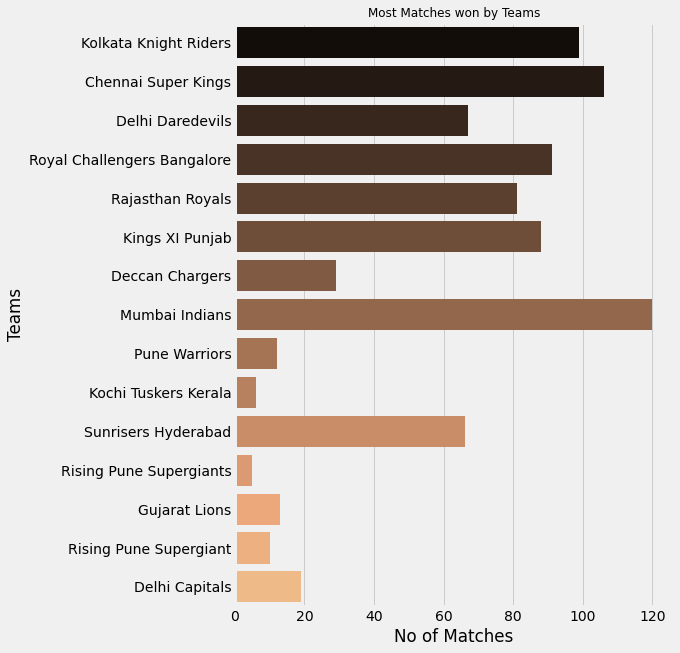

In [64]:
plt.figure(figsize=(7, 10))
sns.countplot(y="winner", data=matches, palette="copper")
plt.title("Most Matches won by Teams", fontsize=12)
plt.xlabel("No of Matches")
plt.ylabel("Teams")

In [65]:
# as you can see that most matches won by KKR.

In [66]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


**Palettes Colors:**


Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

Text(0, 0.5, 'Season')

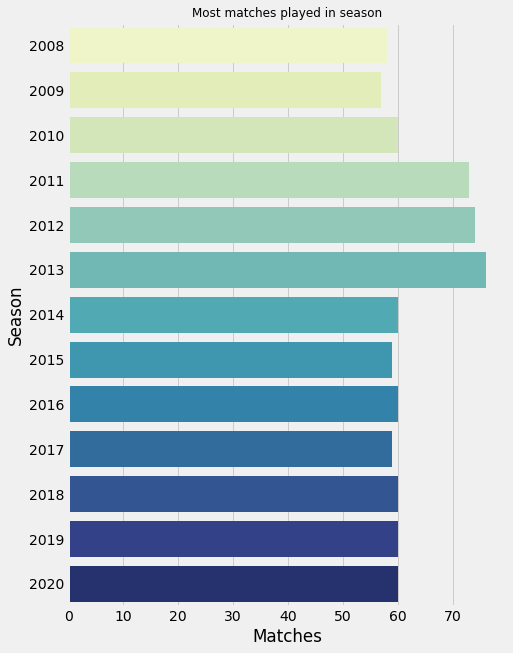

In [67]:
plt.figure(figsize=(7, 10))
sns.countplot(y="season", data=matches, palette="YlGnBu")
plt.title("Most matches played in season", fontsize=12)
plt.xlabel("Matches")
plt.ylabel("Season")

In [68]:
# as you can see that more matches played in season 2013

In [69]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


Text(0, 0.5, 'Matches')

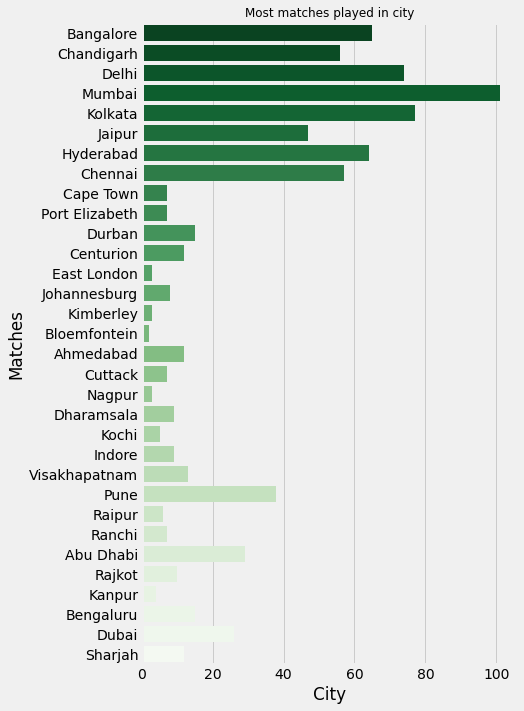

In [70]:
plt.figure(figsize=(6, 11))
sns.countplot(y="city", data=matches, palette="Greens_r")
plt.title("Most matches played in city", fontsize=12)
plt.xlabel("City")
plt.ylabel("Matches")

In [71]:
# as you can see that most matches played in Mumbai

In [72]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


<AxesSubplot:>

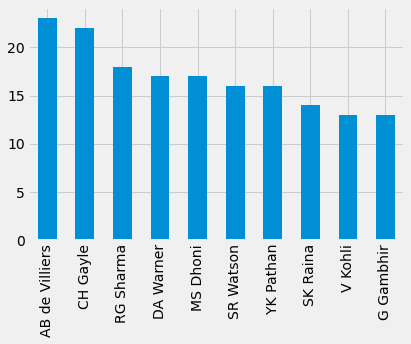

In [73]:
man_of_match_players = matches['player_of_match'].value_counts()
man_of_match_players[:10].plot(kind="bar")

In [74]:
# as you can see that AB is most time man of match

In [75]:
ball_by_ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


<AxesSubplot:>

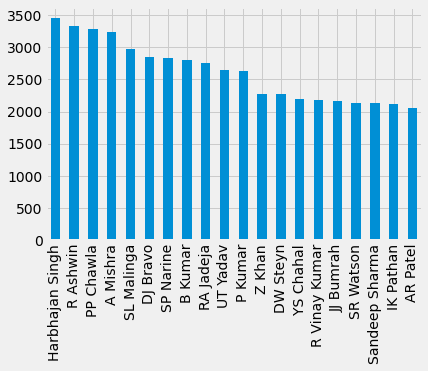

In [76]:
most_ball_bowled_by_bowler = ball_by_ball['bowler'].value_counts()
most_ball_bowled_by_bowler[:20].plot(kind="bar")

In [77]:
# as you can see that most balls bowled by Harbhajan SIngh

EDA By Muhammad Hanan Asghar